In [1]:
import numpy as np
from scipy import optimize
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def warmUpExercise():
    I = np.eye(5)
    return I

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2 Linear regression with one variable

In [4]:
data1 = pd.read_csv('Data/ex1data1.txt', names = ['population', 'profit'])
data1

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
x = data1['population'].values
y = data1['profit'].values
m = y.shape[0]
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

### 2.1 Plotting the Data

Text(0.5, 0, 'Population of City in 10,000s')

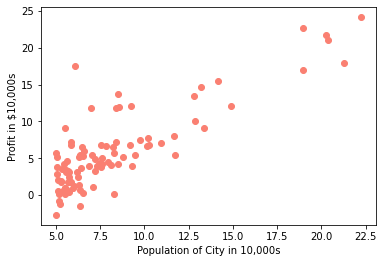

In [6]:
plt.scatter(x, y, color = 'salmon') # Plot the data
plt.ylabel('Profit in $10,000s') # Set the y−axis label
plt.xlabel('Population of City in 10,000s')

### 2.2 Gradient Descent


 The hypothesis is 
 $$h_\theta (x) = \theta \cdot X $$
 con $X = [1; x]$

The objective of linear regression is to minimize the cost function
$$ J(\theta) = \frac{1}{2m} \sum_{i=1} ^m (h_\theta (x) - y^{(i)})^2$$

#### 2.2.1 Update Equations

In batch gradient descent, eachiteration performs the update
$$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1} ^m (h_\theta (x^{(i)}) - y^{(i)})x_j ^{(i)}$$

#### 2.2.2 Implementation

In [69]:
X = np.stack((np.ones(m), x),axis=1) # Add a column of ones to x
print(X.shape)
theta = np.zeros(2) # initialize fitting parameters
iterations = 1500
alpha = 0.01

(97, 2)


#### 2.2.3 Computing the cost

In [68]:
def computeCost(X, y, theta):
    m = y.shape[0]
    h_t = (X @ theta)
    J = (1/(2*m))*(np.linalg.norm(h_t - y)**2)
    return J

In [57]:
print('Testing the cost function ...')
# compute and display initial cost
J1 = computeCost(X, y, theta)
print(f'With theta = [0 ; 0] Cost computed = {J1}')
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.array([[-1],[2]]))
print(f'With theta = [-1 ; 2]\nCost computed = {J}')
print('Expected cost value (approx) 54.24')

Testing the cost function ...
With theta = [0 ; 0] Cost computed = 32.072733877455676
Expected cost value (approx) 32.07
With theta = [-1 ; 2]
Cost computed = 54.242455082012384
Expected cost value (approx) 54.24


#### 2.2.4 Gradient descent

In [66]:
def gradientDescent(X, y, theta, alpha, num_iters):
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
    m = y.shape[0] # number of training examples
    J_history = np.zeros(num_iters) 
    for k in range(num_iters):
        h_theta = (X @ theta)
        theta = theta - (alpha/m)*(X.T @ (h_theta - y)) # (n,m) x (m, ) 
        J_history[k] = computeCost(X, y, theta)
    return theta, J_history

Running Gradient Descent
Theta found by gradient descent:
[-3.63029144  1.16636235]
Expected theta values (approx)
-3.6303,  1.1664


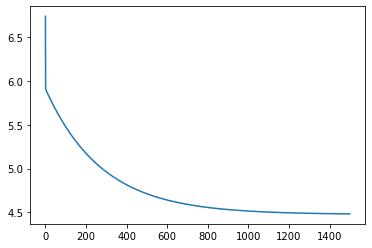

In [70]:
theta = np.zeros(2) # initialize fitting parameters
print('Running Gradient Descent')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
plt.plot(np.arange(iterations), J_history)

# print theta to screen
print('Theta found by gradient descent:')
print(f'{theta}')
print('Expected theta values (approx)')
print('-3.6303,  1.1664')

For population = 35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]


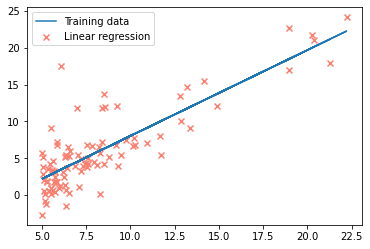

In [72]:
#Plot the linear fit
#hold on;  keep previous plot visible
h_theta = (X @ theta)
plt.scatter(X[:,1], y, marker = 'x', color='salmon')
plt.plot(X[:,1], h_theta, '-')
plt.legend(['Training data', 'Linear regression'])
#hold off # don't overlay any more plots on this figure

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([[1, 3.5]]) @ theta
print(f'For population = 35,000, we predict a profit of {predict1*10000}')
predict2 = np.array([[1, 7]]) @ theta
print(f'For population = 70,000, we predict a profit of {predict2*10000}')

### 2.3 Debugging

### 2.4 Visualizing

In [73]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
tt0, tt1 = np.meshgrid(theta0_vals, theta1_vals)

In [93]:
#computeCost(X, y, np.)
J = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        J[i,j] = computeCost(X, y, np.array([tt0[i,j], tt1[i,j]]))

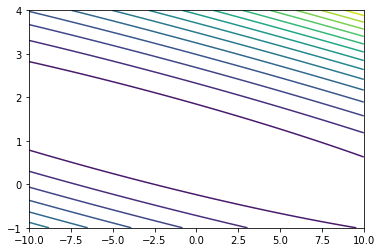

In [98]:
plt.contour(tt0, tt1, J, levels=15)  

Text(0.5, 0, '$J(\\Theta)$')

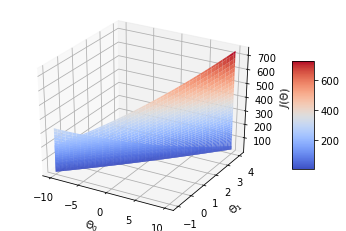

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals, theta1_vals, J,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

# 3 Linear regression with multiple variables


### 3.1 Feature Normalization

In [102]:
def featureNormalize(X):
#FEATURENORMALIZE Normalizes the features in X 
#  FEATURENORMALIZE(X) returns a normalized version of X where
#  the mean value of each feature is 0 and the standard deviation
#  is 1. This is often a good preprocessing step to do when
#  working with learning algorithms.

# You need to set these values correctly
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [106]:
print('Loading data')

# Load Data
#The first column is the size of the house (in square feet), the
#second column is the number of bedrooms, and the third column is the price
#of the house
#data2 = np.loadtxt('Data/ex1data2.txt', delimiter=',')
data2 = pd.read_csv('Data/ex1data2.txt', names=['size', 'bedrooms', 'price'])
data2

Loading data


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [109]:
X = data2[['size', 'bedrooms']]
y = data2['price']
m = y.shape[0]

# Print out some data points
print('First 10 examples from the dataset: ')
print(' x = {X[0:10,:]}, y = {y[0:10,:]}')
        
# Scale features and set them to zero mean
print('Normalizing Features')

X, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = np.concatenate((np.ones((m, 1)), X), axis=1)

First 10 examples from the dataset: 
 x = {X[0:10,:]}, y = {y[0:10,:]}
Normalizing Features


### 3.2 Gradient Descent

Theta computed from gradient descent: 
 [334302.06399328  99411.44947359   3267.01285407] 
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $[1.64372995e+08]


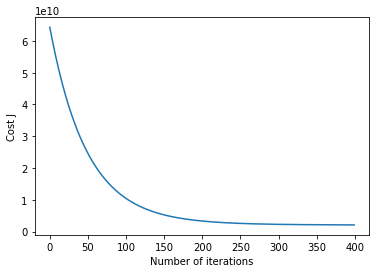

In [115]:
# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros(3) # n = 2, theta in R^n+1
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent: ')
print(f' {theta} ')

In [116]:
price = np.array([[1, 1650, 3]]) @ theta
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${price}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $[1.64372995e+08]


#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

In [126]:
#Learning rate = 1
# Choose some alpha value
alpha = 0.1
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros(3) # n = 2, theta in R^n+1
theta, J2_history = gradientDescent(X, y, theta, alpha, num_iters)

In [127]:
#Learning rate = 10
# Choose some alpha value
alpha = 1
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros(3) # n = 2, theta in R^n+1
theta, J3_history = gradientDescent(X, y, theta, alpha, num_iters)

Text(0.5, 1.0, '$alpha=0.01$')

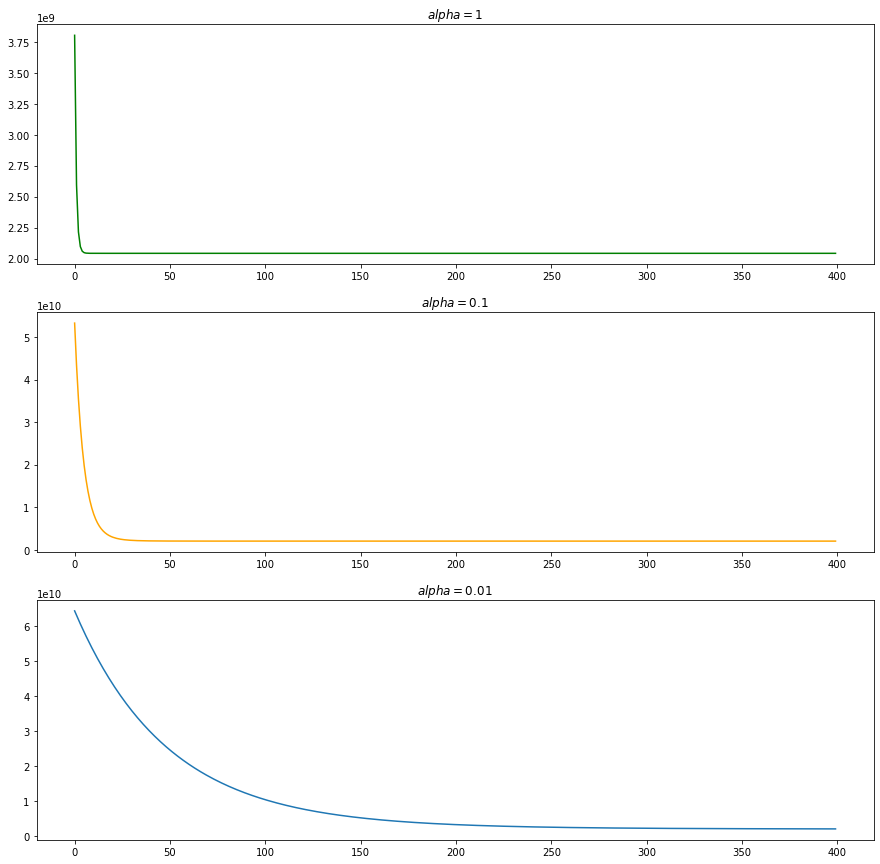

In [129]:
fig, axs = plt.subplots(3, 1,figsize=(15,15))
axs[0].plot(J3_history, 'green')
axs[0].set_title('$alpha=1$')

axs[1].plot(J2_history, 'orange')
axs[1].set_title('$alpha=0.1$')

axs[2].plot(J_history)
axs[2].set_title('$alpha=0.01$')

### 3.3 Normal Equations

$$\theta = (X^T X)^{-1}X^T y $$

In [130]:
def normalEqn(X,y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [131]:
theta = normalEqn(X,y)
